#**Importing Libraries and Reading the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
hd=pd.read_csv('/content/final_heart.csv')
hd.head()

,ca,chol,thal_3,slope_2,age,exang,trestbps,thal_2,oldpeak,thalach,target
0,2,-0.701940,True,True,-0.256357,0,-0.371077,False,-0.008573,0.801255,0
1,0,-0.892006,True,False,-0.145641,1,0.484371,False,1.907455,0.233473,0
2,0,-1.504441,True,False,1.736541,1,0.769520,False,1.451258,-1.076792,0
3,1,-0.892006,True,True,0.740092,0,0.940610,False,-0.920967,0.495526,0
4,3,1.029772,False,False,0.850808,0,0.370311,True,0.812582,-1.906626,0


# **Data Inspection**

In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ca        298 non-null    int64  
 1   chol      298 non-null    float64
 2   thal_3    298 non-null    bool   
 3   slope_2   298 non-null    bool   
 4   age       298 non-null    float64
 5   exang     298 non-null    int64  
 6   trestbps  298 non-null    float64
 7   thal_2    298 non-null    bool   
 8   oldpeak   298 non-null    float64
 9   thalach   298 non-null    float64
 10  target    298 non-null    int64  
dtypes: bool(3), float64(5), int64(3)
memory usage: 19.6 KB


In [ ]:
hd.describe()

,ca,chol,age,exang,trestbps,oldpeak,thalach,target
count,298.000000,2.980000e+02,2.980000e+02,298.000000,2.980000e+02,2.980000e+02,2.980000e+02,298.000000
mean,0.714765,1.683962e-16,-2.354567e-16,0.328859,6.586827e-16,-2.384372e-16,3.427534e-16,0.543624
std,1.002950,1.001682e+00,1.001682e+00,0.470589,1.001682e+00,1.001682e+00,1.001682e+00,0.498931
min,0.000000,-2.518127e+00,-2.802838e+00,0.000000,-2.139003e+00,-9.209672e-01,-3.435268e+00,0.000000
25%,0.000000,-7.230588e-01,-7.822607e-01,0.000000,-6.562262e-01,-9.209672e-01,-7.164687e-01,0.000000
50%,0.000000,-1.000646e-01,7.579254e-02,0.000000,-8.592755e-02,-2.366714e-01,1.242846e-01,1.000000
75%,1.000000,6.074034e-01,7.400918e-01,1.000000,4.843711e-01,5.388638e-01,7.139039e-01,1.000000
max,4.000000,3.458394e+00,2.511557e+00,1.000000,3.906163e+00,3.093568e+00,2.286222e+00,1.000000


In [ ]:
X = hd.drop("target", axis=1)
y = hd["target"]
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)

Shape of X: (298, 10)

Shape of y: (298,)


# **Splitting Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
print(hd.describe().T)

          count          mean       std       min       25%       50%  \
ca        298.0  7.147651e-01  1.002950  0.000000  0.000000  0.000000   
chol      298.0  1.683962e-16  1.001682 -2.518127 -0.723059 -0.100065   
age       298.0 -2.354567e-16  1.001682 -2.802838 -0.782261  0.075793   
exang     298.0  3.288591e-01  0.470589  0.000000  0.000000  0.000000   
trestbps  298.0  6.586827e-16  1.001682 -2.139003 -0.656226 -0.085928   
oldpeak   298.0 -2.384372e-16  1.001682 -0.920967 -0.920967 -0.236671   
thalach   298.0  3.427534e-16  1.001682 -3.435268 -0.716469  0.124285   
target    298.0  5.436242e-01  0.498931  0.000000  0.000000  1.000000   

               75%       max  
ca        1.000000  4.000000  
chol      0.607403  3.458394  
age       0.740092  2.511557  
exang     1.000000  1.000000  
trestbps  0.484371  3.906163  
oldpeak   0.538864  3.093568  
thalach   0.713904  2.286222  
target    1.000000  1.000000  


# **Logistec Regression Model**

In [ ]:
logreg=LogisticRegression(max_iter=1000)

In [ ]:
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
Confusion Matrix:
 [[26  1]
 [ 4 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.97      0.88      0.92        33

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



AUC Score: 0.9382716049382717


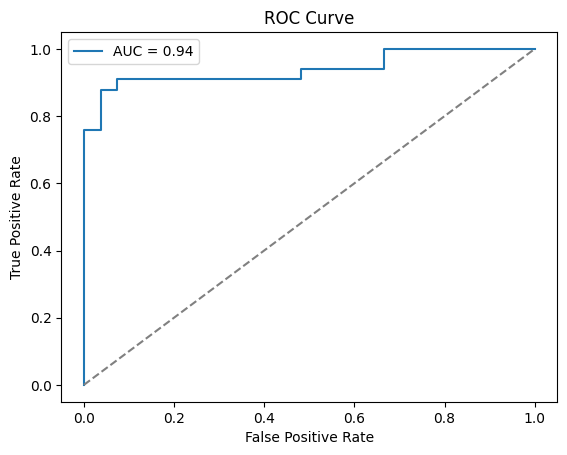

In [ ]:
y_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Decisoin Tree Classifier Model**

In [ ]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)

In [ ]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10, None]
}

# Grid search with cross-validation
grid = GridSearchCV(dtc, param_grid, cv=5, scoring="accuracy")
grid.fit(X, y)

print("Best max_depth:", grid.best_params_)
print("Best score:", grid.best_score_)

Best max_depth: {'max_depth': 4}
Best score: 0.7515254237288136


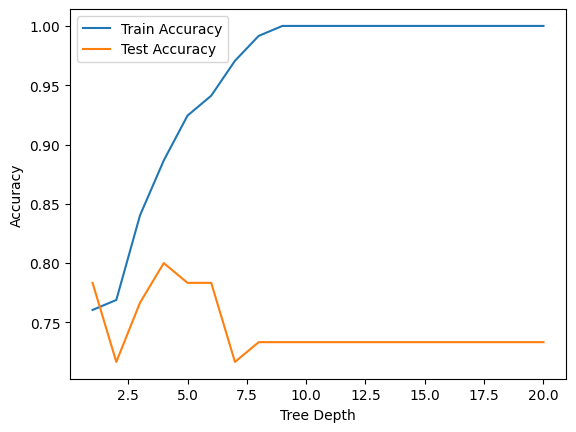

In [ ]:
depths = range(1, 21)
train_acc, test_acc = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(depths, train_acc, label="Train Accuracy")
plt.plot(depths, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Confusion Matrix:
 [[23  4]
 [ 8 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.86      0.76      0.81        33

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



AUC Score: 0.7968574635241303


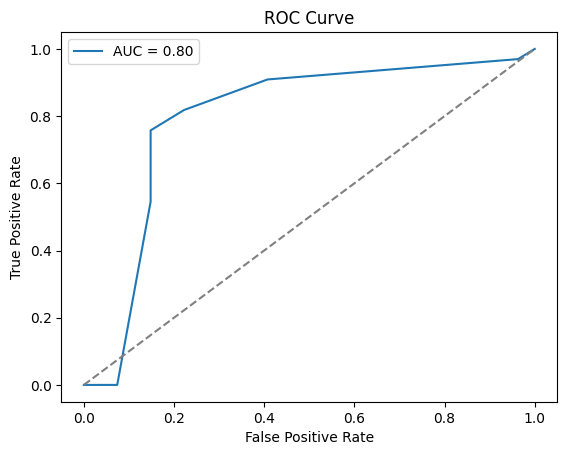

In [ ]:
y_prob = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#**Random Forest Classifier Model**



In [ ]:
rfc = RandomForestClassifier(max_depth=4,random_state=42)

In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("Random Forest Results\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Results

Accuracy: 0.8666666666666667

Confusion Matrix:
 [[24  3]
 [ 5 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.90      0.85      0.88        33

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



AUC Score: 0.9057239057239057


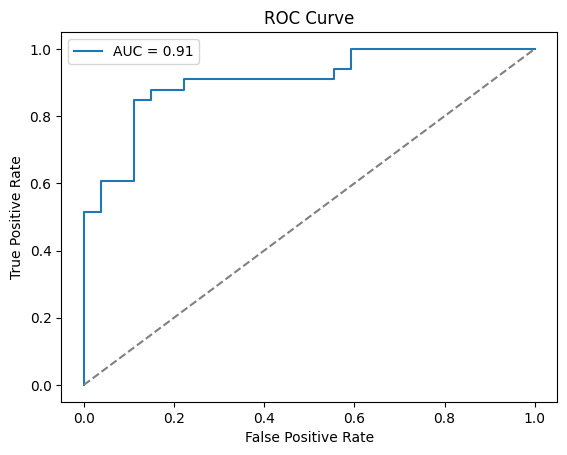

In [ ]:
y_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#**Support Vector Classifier Model**

In [ ]:
svm = SVC(probability=True,random_state=42)

In [ ]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM Results
Accuracy: 0.8833333333333333
Confusion Matrix:
 [[24  3]
 [ 4 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.89        33

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



AUC Score: 0.9248035914702581


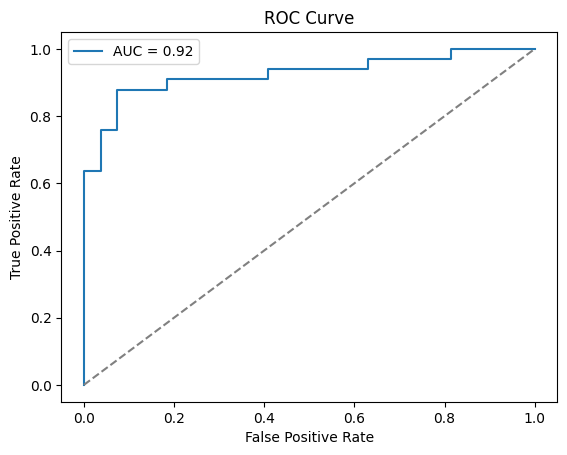

In [ ]:
y_prob = svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Combined ROC Curves & AUCs**

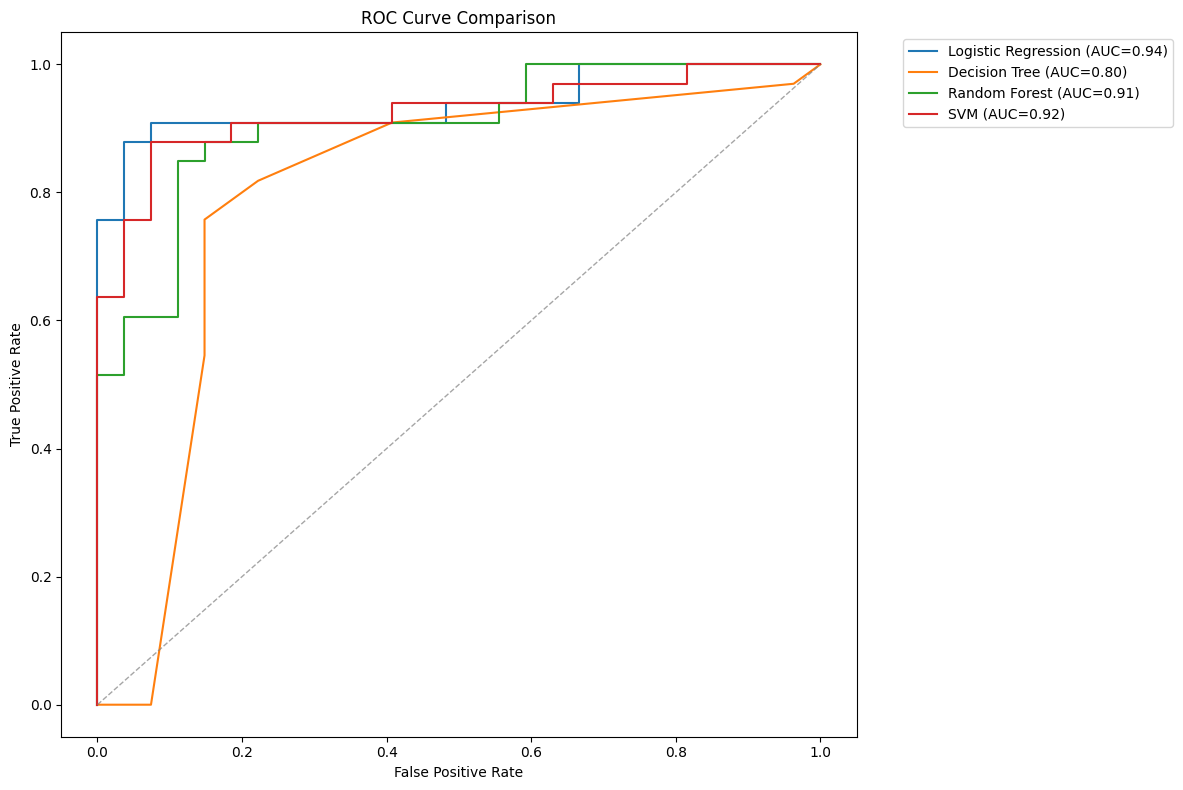

In [ ]:
fitted_models = {
    "Logistic Regression": logreg,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "SVM": svm,
}

plt.figure(figsize=(12,8))

for name, model in fitted_models.items():
    # choose scaled or raw depending on model
    if name in ["Logistic Regression", "SVM"]:
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.predict_proba(X_test)[:, 1]

    # compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # plot each model’s ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

# baseline (random classifier)
plt.plot([0,1],[0,1], color='gray', linestyle="--", linewidth=1, alpha=0.7)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()